## Imports and Loading DataFrame

In [4]:
import csv
import pandas as pd
import numpy as np
import math

FifteenFeatures = pd.read_csv("15features.csv", delimiter = ',')
FifteenFeatures = FifteenFeatures.drop('imagename', axis=1)
cols = ['pen_pressure_left', 'is_lowercase_left', 'letter_spacing_left', 'size_left', 'slantness_left', 'staff_of_d_left', 'exit_stroke_d_left', 'entry_stroke_a_left', 'dimension_left', 'is_continuous_left', 'staff_of_a_left', 'tilt_left', 'formation_n_left', 'constancy_left', 'word_formation_left']
FifteenFeatures.columns = cols

## Creating Concatenated CSV for Pairs

In [5]:
def initialize_csv(filename):
    data = pd.read_csv("15features.csv")
    pairs = pd.read_csv(filename)
    pairs = pairs.drop(pairs.columns[0],axis=1)
    original = list(data)
    data.rename(columns={'imagename':'left'}, inplace=True)
    temp = pairs.set_index('left').join(data.set_index('left'))
    temp = temp.reset_index()

    data.rename(columns={'left':'right'}, inplace=True)
    dataset_concatenated = temp.set_index('right').join(data.set_index('right'), lsuffix='_left', rsuffix='_right')
    dataset_concatenated = dataset_concatenated.reset_index();
    
    names = list(dataset_concatenated)
    names.remove("left")
    names.remove("right")
    names = ["left","right"]+names
    print(names)
    dataset_concatenated = dataset_concatenated[names]
    dataset_concatenated = dataset_concatenated.dropna()
#     dataset_concatenated.to_csv("features.csv")
    
    return dataset_concatenated

## HillClimb to Find BayesianModel

In [6]:
import time
import networkx as nx
import pylab as plt
from pgmpy.models.BayesianModel import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

start = time.time()

hc = HillClimbSearch(FifteenFeatures, scoring_method=K2Score(FifteenFeatures))
best_model = hc.estimate()

end = time.time()
print("Time To HillClimb : " + str((end - start)/60) + " mins")

k2 = K2Score(FifteenFeatures)

bayesian_model = BayesianModel(best_model.edges())

Time To HillClimb : 3.8445698817571006 mins


## Displaying Bayesian Model

Bayesian Model is :
[('pen_pressure_left', 'slantness_left'), ('pen_pressure_left', 'is_lowercase_left'), ('slantness_left', 'is_continuous_left'), ('slantness_left', 'formation_n_left'), ('letter_spacing_left', 'exit_stroke_d_left'), ('letter_spacing_left', 'pen_pressure_left'), ('letter_spacing_left', 'tilt_left'), ('letter_spacing_left', 'is_lowercase_left'), ('letter_spacing_left', 'formation_n_left'), ('letter_spacing_left', 'dimension_left'), ('exit_stroke_d_left', 'staff_of_d_left'), ('exit_stroke_d_left', 'entry_stroke_a_left'), ('tilt_left', 'staff_of_d_left'), ('tilt_left', 'formation_n_left'), ('tilt_left', 'slantness_left'), ('tilt_left', 'exit_stroke_d_left'), ('tilt_left', 'dimension_left'), ('dimension_left', 'pen_pressure_left'), ('size_left', 'letter_spacing_left'), ('size_left', 'staff_of_d_left'), ('size_left', 'exit_stroke_d_left'), ('size_left', 'pen_pressure_left'), ('staff_of_d_left', 'formation_n_left'), ('staff_of_d_left', 'is_lowercase_left'), ('staff_of_d_lef

C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_p

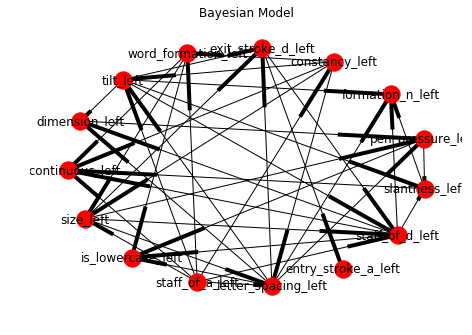

In [7]:
print("Bayesian Model is :")
print(bayesian_model.edges())
print('Bayesian Model K2 Score is: ' + str(k2.score(bayesian_model)))
nx.draw(bayesian_model, with_labels = True)
plt.title("Bayesian Model")
plt.savefig('best_bayesian_model.png')
plt.show()

Bayesian Model1 is :
[('pen_pressure_left', 'slantness_left'), ('pen_pressure_left', 'is_lowercase_left'), ('slantness_left', 'is_continuous_left'), ('slantness_left', 'formation_n_left'), ('letter_spacing_left', 'exit_stroke_d_left'), ('letter_spacing_left', 'pen_pressure_left'), ('letter_spacing_left', 'tilt_left'), ('letter_spacing_left', 'is_lowercase_left'), ('letter_spacing_left', 'formation_n_left'), ('letter_spacing_left', 'dimension_left'), ('exit_stroke_d_left', 'staff_of_d_left'), ('exit_stroke_d_left', 'entry_stroke_a_left'), ('tilt_left', 'staff_of_d_left'), ('tilt_left', 'formation_n_left'), ('tilt_left', 'slantness_left'), ('tilt_left', 'exit_stroke_d_left'), ('tilt_left', 'dimension_left'), ('dimension_left', 'pen_pressure_left'), ('size_left', 'letter_spacing_left'), ('size_left', 'staff_of_d_left'), ('size_left', 'exit_stroke_d_left'), ('size_left', 'pen_pressure_left'), ('staff_of_d_left', 'formation_n_left'), ('staff_of_d_left', 'is_lowercase_left'), ('staff_of_d_le

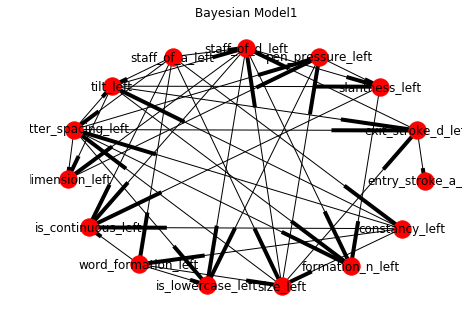

In [8]:
model1 = BayesianModel([('pen_pressure_left', 'slantness_left'),
                        ('pen_pressure_left', 'is_lowercase_left'),
                        ('slantness_left', 'is_continuous_left'),
                        ('slantness_left', 'formation_n_left'),
                        ('letter_spacing_left', 'exit_stroke_d_left'),
                        ('letter_spacing_left', 'pen_pressure_left'),
                        ('letter_spacing_left', 'dimension_left'),
                        ('exit_stroke_d_left', 'staff_of_d_left'),
                        ('exit_stroke_d_left', 'entry_stroke_a_left'),
                        ('tilt_left', 'slantness_left'),
                        ('tilt_left', 'exit_stroke_d_left'), 
                        ('tilt_left', 'dimension_left'),
                        ('dimension_left', 'pen_pressure_left'),
                        ('size_left', 'letter_spacing_left'),
                        ('size_left', 'pen_pressure_left'), 
                        ('staff_of_d_left', 'formation_n_left'), 
                        ('staff_of_d_left', 'is_lowercase_left'),
                        ('staff_of_d_left', 'slantness_left'), 
                        ('staff_of_a_left', 'word_formation_left'), 
                        ('staff_of_a_left', 'staff_of_d_left'), 
                        ('staff_of_a_left', 'letter_spacing_left'), 
                        ('staff_of_a_left', 'is_continuous_left'), 
                        ('word_formation_left', 'is_continuous_left'), 
                        ('word_formation_left', 'is_lowercase_left'), 
                        ('word_formation_left', 'size_left'),
                        ('constancy_left', 'word_formation_left')])

k2 = K2Score(FifteenFeatures)

print("Bayesian Model1 is :")
print(bayesian_model.edges())
print('Bayesian Model1 K2 Score is: ' + str(k2.score(model1)))
nx.draw(bayesian_model, with_labels = True)
plt.title("Bayesian Model1")
plt.savefig('bayesian_model1.png')
plt.show()

Bayesian Model2 is :
[('pen_pressure_left', 'slantness_left'), ('pen_pressure_left', 'is_lowercase_left'), ('slantness_left', 'is_continuous_left'), ('slantness_left', 'formation_n_left'), ('letter_spacing_left', 'exit_stroke_d_left'), ('letter_spacing_left', 'pen_pressure_left'), ('letter_spacing_left', 'tilt_left'), ('letter_spacing_left', 'is_lowercase_left'), ('letter_spacing_left', 'formation_n_left'), ('letter_spacing_left', 'dimension_left'), ('exit_stroke_d_left', 'staff_of_d_left'), ('exit_stroke_d_left', 'entry_stroke_a_left'), ('tilt_left', 'staff_of_d_left'), ('tilt_left', 'formation_n_left'), ('tilt_left', 'slantness_left'), ('tilt_left', 'exit_stroke_d_left'), ('tilt_left', 'dimension_left'), ('dimension_left', 'pen_pressure_left'), ('size_left', 'letter_spacing_left'), ('size_left', 'staff_of_d_left'), ('size_left', 'exit_stroke_d_left'), ('size_left', 'pen_pressure_left'), ('staff_of_d_left', 'formation_n_left'), ('staff_of_d_left', 'is_lowercase_left'), ('staff_of_d_le

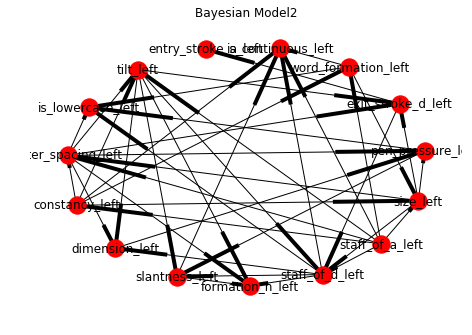

In [17]:
model2 = BayesianModel([('pen_pressure_left', 'slantness_left'),
                        ('pen_pressure_left', 'is_lowercase_left'),
                        ('slantness_left', 'is_continuous_left'),
                        ('slantness_left', 'formation_n_left'),
                        ('letter_spacing_left', 'exit_stroke_d_left'),
                        ('letter_spacing_left', 'dimension_left'),
                        ('exit_stroke_d_left', 'staff_of_d_left'),
                        ('exit_stroke_d_left', 'entry_stroke_a_left'),
                        ('tilt_left', 'slantness_left'),
                        ('slantness_left', 'exit_stroke_d_left'), 
                        ('slantness_left', 'dimension_left'),
                        ('size_left', 'letter_spacing_left'),
                        ('size_left', 'pen_pressure_left'), 
                        ('staff_of_a_left', 'formation_n_left'), 
                        ('staff_of_a_left', 'is_lowercase_left'),
                        ('staff_of_a_left', 'slantness_left'), 
                        ('staff_of_d_left', 'word_formation_left'), 
                        ('staff_of_a_left', 'staff_of_d_left'),
                        ('staff_of_d_left', 'is_continuous_left'), 
                        ('constancy_left', 'is_continuous_left'),])

k2 = K2Score(FifteenFeatures)

print("Bayesian Model2 is :")
print(bayesian_model.edges())
print('Bayesian Model2 K2 Score is: ' + str(k2.score(model2)))
nx.draw(bayesian_model, with_labels = True)
plt.title("Bayesian Model2")
plt.savefig('bayesian_model2.png')
plt.show()

In [18]:
print("The K2 Scores for Models are :")
print('Bayesian Model1 K2 Score is: ' + str(k2.score(model1)))
print('Bayesian Model3 K2 Score is: ' + str(k2.score(model2)))
print('Bayesian Model3 K2 Score is: ' + str(k2.score(bayesian_model)))
print('Thus the Best Model is Model3, We will Take this as the bayesian_model from now on.')

The K2 Scores for Models are :
Bayesian Model1 K2 Score is: -143889.5334535705
Bayesian Model3 K2 Score is: -148041.4200154499
Bayesian Model3 K2 Score is: -139940.6025016286
Thus the Best Model is Model3, We will Take this as the bayesian_model from now on.


## Copying Model and Changing Node Names

Bayesian Model Copy is :
[('pen_pressure_right', 'slantness_right'), ('pen_pressure_right', 'is_lowercase_right'), ('slantness_right', 'is_continuous_right'), ('slantness_right', 'formation_n_right'), ('letter_spacing_right', 'exit_stroke_d_right'), ('letter_spacing_right', 'pen_pressure_right'), ('letter_spacing_right', 'tilt_right'), ('letter_spacing_right', 'is_lowercase_right'), ('letter_spacing_right', 'formation_n_right'), ('letter_spacing_right', 'dimension_right'), ('exit_stroke_d_right', 'staff_of_d_right'), ('exit_stroke_d_right', 'entry_stroke_a_right'), ('tilt_right', 'staff_of_d_right'), ('tilt_right', 'formation_n_right'), ('tilt_right', 'slantness_right'), ('tilt_right', 'exit_stroke_d_right'), ('tilt_right', 'dimension_right'), ('dimension_right', 'pen_pressure_right'), ('staff_of_d_right', 'formation_n_right'), ('staff_of_d_right', 'is_lowercase_right'), ('staff_of_d_right', 'dimension_right'), ('staff_of_d_right', 'is_continuous_right'), ('staff_of_d_right', 'slantnes

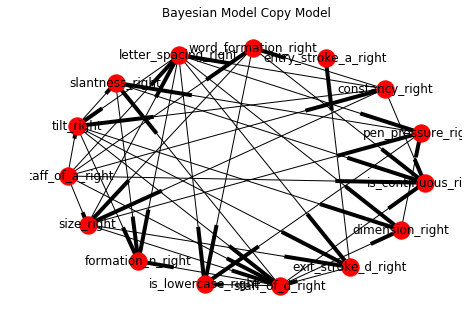

In [19]:
bayesian_model_copy = BayesianModel()
for edge in bayesian_model.edges():
    a = (str(edge[0])[:-5] + "_right")
    b = (str(edge[1])[:-5] + "_right")
    bayesian_model_copy.add_edge(a,b)
print("Bayesian Model Copy is :")
print(bayesian_model_copy.edges())
print('Bayesian Model Copy K2 Score is: ' + str(k2.score(bayesian_model)))
nx.draw(bayesian_model_copy, with_labels = True)
plt.title("Bayesian Model Copy Model")
plt.savefig('bayesian_model_copy.png')
plt.show()

def create_data_partitions(dataframe):
    training_percentage = 80
    test_percentage = 20
    trainingLen = int(math.ceil(len(dataframe)*(training_percentage*0.01)))
    training_features  = dataframe[:trainingLen]
    print(str(training_percentage) + "% Training Generated..")
    testLen = int(math.ceil(len(dataframe)*(test_percentage*0.01)))
    test_features  = dataframe[trainingLen:]
    print(str(test_percentage) + "% test Generated..")
    
    return training_features,test_features

## Creating Final Model

pen_pressure_left : 5
slantness_left : 5
is_lowercase_left : 4
is_continuous_left : 5
formation_n_left : 4
letter_spacing_left : 9
exit_stroke_d_left : 5
tilt_left : 8
dimension_left : 4
staff_of_d_left : 9
entry_stroke_a_left : 1
size_left : 7
staff_of_a_left : 7
word_formation_left : 5
constancy_left : 6
pen_pressure_right : 5
slantness_right : 5
is_lowercase_right : 4
is_continuous_right : 5
formation_n_right : 4
letter_spacing_right : 9
exit_stroke_d_right : 5
tilt_right : 8
dimension_right : 4
staff_of_d_right : 9
entry_stroke_a_right : 1
size_right : 7
staff_of_a_right : 7
word_formation_right : 5
constancy_right : 6
['left', 'right', 'label', 'pen_pressure_left', 'letter_spacing_left', 'size_left', 'dimension_left', 'is_lowercase_left', 'is_continuous_left', 'slantness_left', 'tilt_left', 'entry_stroke_a_left', 'staff_of_a_left', 'formation_n_left', 'staff_of_d_left', 'exit_stroke_d_left', 'word_formation_left', 'constancy_left', 'pen_pressure_right', 'letter_spacing_right', 'si

C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Parth\Anaconda3\lib\site-packages\networkx\drawing\nx_p

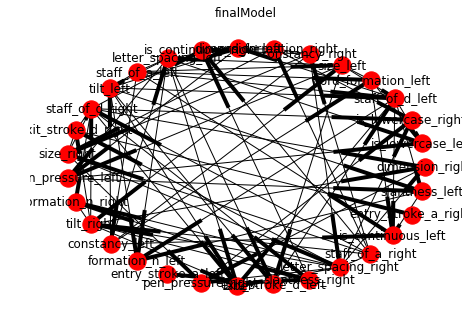

In [29]:
finalModel = BayesianModel()
for edge in bayesian_model.edges():
    finalModel.add_edge(edge[0],edge[1])
for edge in bayesian_model_copy.edges():
    finalModel.add_edge(edge[0],edge[1])

for node in finalModel.nodes():
    print(node + " : " + str(finalModel.degree(node)))

##Adding Nodes with highest degree

finalModel.add_node('label')
finalModel.add_edge('letter_spacing_left','label')
finalModel.add_edge('letter_spacing_right','label')
finalModel.add_edge('tilt_right','label')
finalModel.add_edge('tilt_left','label')
finalModel.add_edge('staff_of_d_left','label')
finalModel.add_edge('staff_of_d_right','label')

seen_training = initialize_csv("dataset_seen_training_siamese.csv")
seen_training = seen_training.drop('left', axis=1)
seen_training = seen_training.drop('right', axis=1)

print(finalModel.edges())

trainData,testData = create_data_partitions(seen_training)

start = time.time()

finalModel.fit(trainData)

end = time.time()
print("Time To Train : " + str((end - start)) + " seconds")

nx.draw(finalModel, with_labels = True)
plt.title("finalModel")
plt.savefig('finalModel.png')
plt.show()

## Inference using MAP to find Accuracy

In [21]:
from pgmpy.inference import VariableElimination
from sklearn.utils import shuffle

start = time.time()
# print(start)

inference = VariableElimination(finalModel)
counter = 0
trainData = shuffle(trainData)
trainData = trainData[:500]

for index,row in trainData.iterrows():
    row = row.astype(int)
    mle1 = inference.map_query(variables={'label'},
                                evidence={
                                'letter_spacing_left' : int(row['letter_spacing_left'])-1,
                                'tilt_left' : int(row['tilt_left'])-1,
                                'staff_of_d_left' : int(row['staff_of_d_left'])-1,
                                'letter_spacing_right' : int(row['letter_spacing_right'])-1,
                                'tilt_right' : int(row['tilt_right'])-1,
                                'staff_of_d_right' : int(row['staff_of_d_right'])-1})
                               
    print((mle1['label'],row['label'],(mle1['label'] == row['label'])))                         
    if(mle1['label'] == row['label']):
        counter+=1

end = time.time()
print("Time To infer Training Data : " + str((end - start)) + " seconds")

print("Accuracy for Training is : " + str(counter/trainData.shape[0]*100))

C:\Users\Parth\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]
C:\Users\Parth\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]


(0, 0, True)
(0, 1, False)
(1, 1, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 1, False)
(0, 1, False)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(0, 1, False)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 0, False)
(1, 1, True)
(0, 0, True)
(0, 1, False)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 0, False)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 1, False)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(1, 0, False)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 1, False)
(0, 1, False)
(0, 1, False)


In [22]:
from pgmpy.inference import VariableElimination
import time

start = time.time()
# print(start)

inference = VariableElimination(finalModel)
counter = 0
testData = shuffle(testData)
testData = testData[:500]
for index,row in testData.iterrows():
    row = row.astype(int) 
    mle1 = inference.map_query(variables={'label'},
                                evidence={
                                'letter_spacing_left' : int(row['letter_spacing_left'])-1,
                                'tilt_left' : int(row['tilt_left'])-1,
                                'staff_of_d_left' : int(row['staff_of_d_left'])-1,
                                'letter_spacing_right' : int(row['letter_spacing_right'])-1,
                                'tilt_right' : int(row['tilt_right'])-1,
                                'staff_of_d_right' : int(row['staff_of_d_right'])-1})
                               
    print((mle1['label'],row['label'],(mle1['label'] == row['label'])))
                               
    print((mle1['label'],row['label'],(mle1['label'] == row['label'])))                       
    if(mle1['label'] == row['label']):
        counter+=1

end = time.time()
print("Time To infer Testing Data : " + str((end - start)) + " seconds")

print("Accuracy for Testing is : " + str(counter/testData.shape[0]*100))

(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 1, False)
(0, 1, False)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 0, False)
(1, 0, False)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 1, False)
(0, 1, False)
(1, 1, True)
(1, 1, True)
(1, 0, False)
(1, 0, False)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 

(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(1, 1, True)
(1, 1, True)
(1, 0, False)
(1, 0, False)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 0, False)
(1, 0, False)
(0, 1, False)
(0, 1, False)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(1, 1, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(0, 0, True)
(1, 0, False)
(1, 0, False)
(0, 0, True)
(0, 0, True)
(1, 

In [28]:
counter = 0
for i in finalModel.edges():
    counter+=1
print(counter)

90
